In [12]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime


In [2]:
df = pd.read_csv('dataset_thonny_logs.csv') 

c:\users\alexf\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def display_all(df):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(df)
display_all(df.head())

,view_id,view_class,sequence,time,student_ID,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,widget_class,index,text,tags,trivial_for_coloring,trivial_for_parens,text_widget_context,index1,index2,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
0,ShellView,ShellView,ShowView,2020-03-23T14:33:24.525803,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AssistantView,AssistantView,ShowView,2020-03-23T14:33:24.543817,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,EditorTextCreated,2020-03-23T14:33:24.578842,1,75874928.0,Editor,75874448.0,CodeViewText,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NewFile,2020-03-23T14:33:24.579842,1,75874928.0,Editor,75874448.0,CodeViewText,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ShellView,ShellView,ShowView,2020-03-23T14:33:24.579842,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_ID,2236969.0,5.705124e+01,3.163410e+01,1.0,29.00,63.00,8.600000e+01,1.060000e+02
editor_id,26873.0,2.498610e+12,1.854013e+13,1598960.0,70105488.00,81174512.00,1.517544e+08,1.406988e+14
text_widget_id,1953485.0,2.546304e+12,1.871241e+13,1597616.0,70878544.00,80207152.00,1.694847e+08,1.406988e+14
widget_id,334764.0,1.543278e+12,1.462028e+13,1597616.0,56461008.00,74537168.00,1.163127e+08,1.406989e+14
index,1537730.0,1.022425e+03,1.744272e+03,1.0,9.17,37.17,1.430000e+03,6.981000e+03
index1,265869.0,4.963397e+01,2.528429e+02,1.0,5.90,13.15,3.411000e+01,6.812000e+03


# Information about Missing values


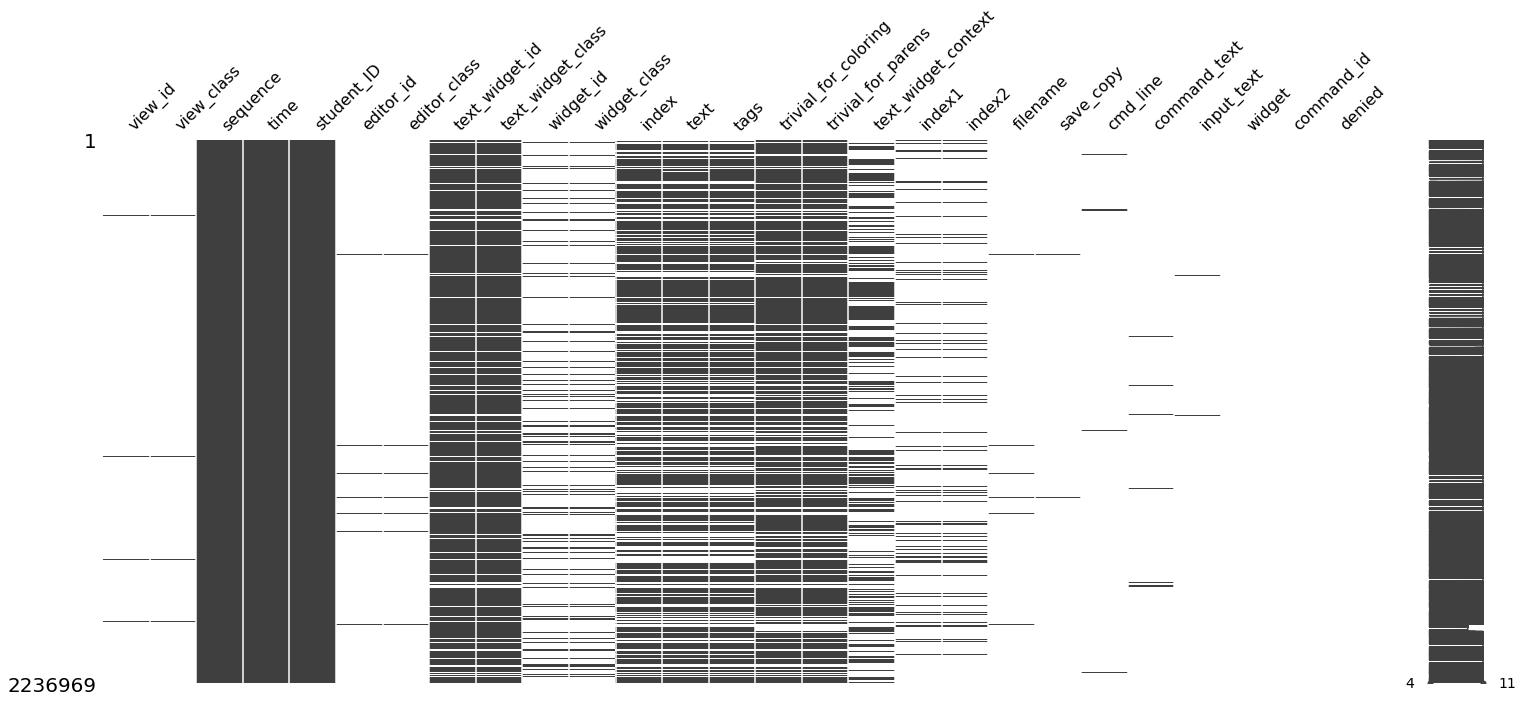

In [5]:
msno.matrix(df)
plt.show()

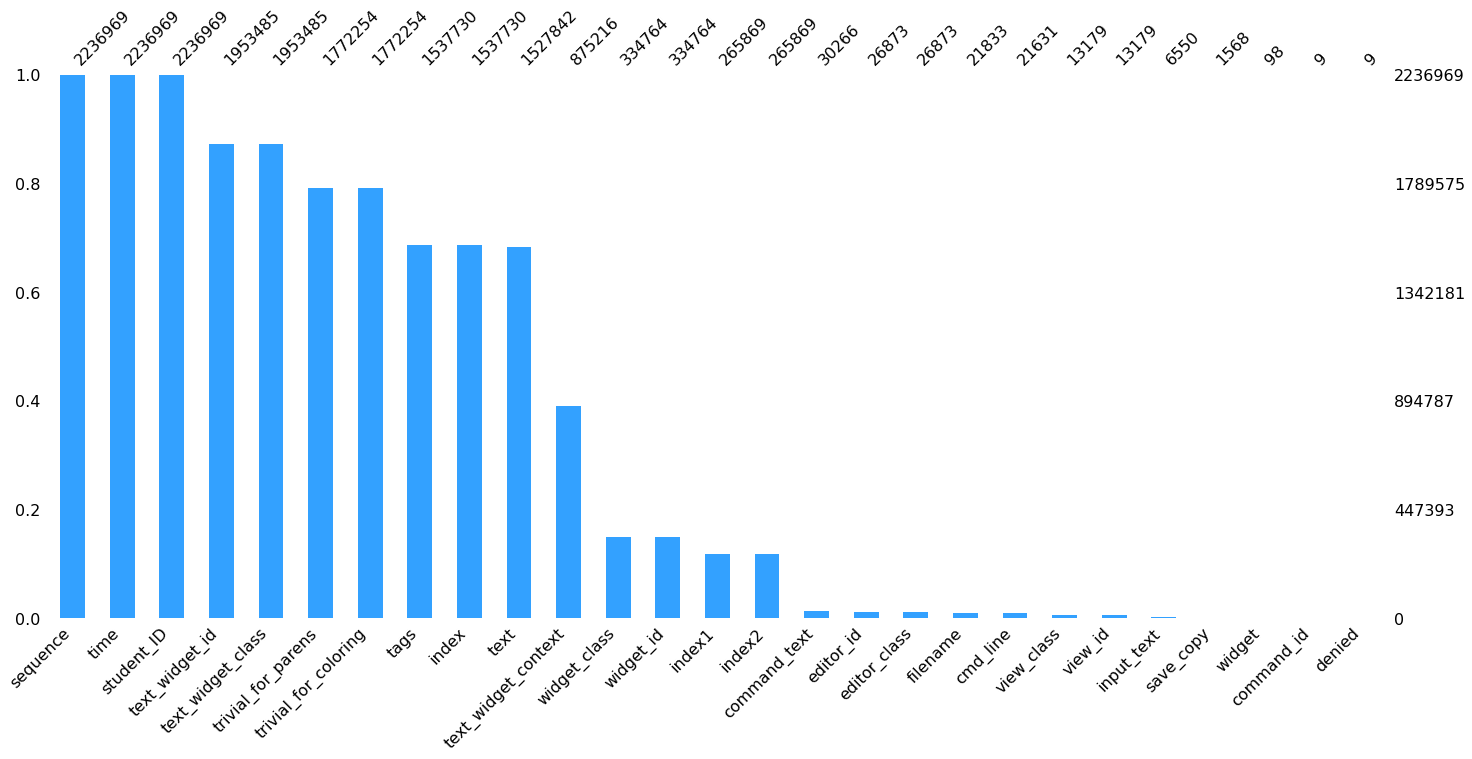

In [6]:
msno.bar(df,sort='descending',color='#33A1FF')
plt.show()

In [11]:
def Missing_Values(df):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in df.columns:
        variable_name.append(col)
        data_type.append(df[col].dtype)
        total_value.append(df[col].shape[0])
        total_missing_value.append(df[col].isnull().sum())
        missing_value_rate.append(round(df[col].isnull().sum()/df[col].shape[0],4))


        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "Total_Value":total_value,\
                               "Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type\

                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

dataframe_info = Missing_Values(df)
dataframe_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type
Variable,,,,
denied,2236969,2236960,1.0000,object
command_id,2236969,2236960,1.0000,object
widget,2236969,2236871,1.0000,object
save_copy,2236969,2235401,0.9993,object
input_text,2236969,2230419,0.9971,object
view_class,2236969,2223790,0.9941,object
view_id,2236969,2223790,0.9941,object
cmd_line,2236969,2215338,0.9903,object
filename,2236969,2215136,0.9902,object


Heatmap

<AxesSubplot:>

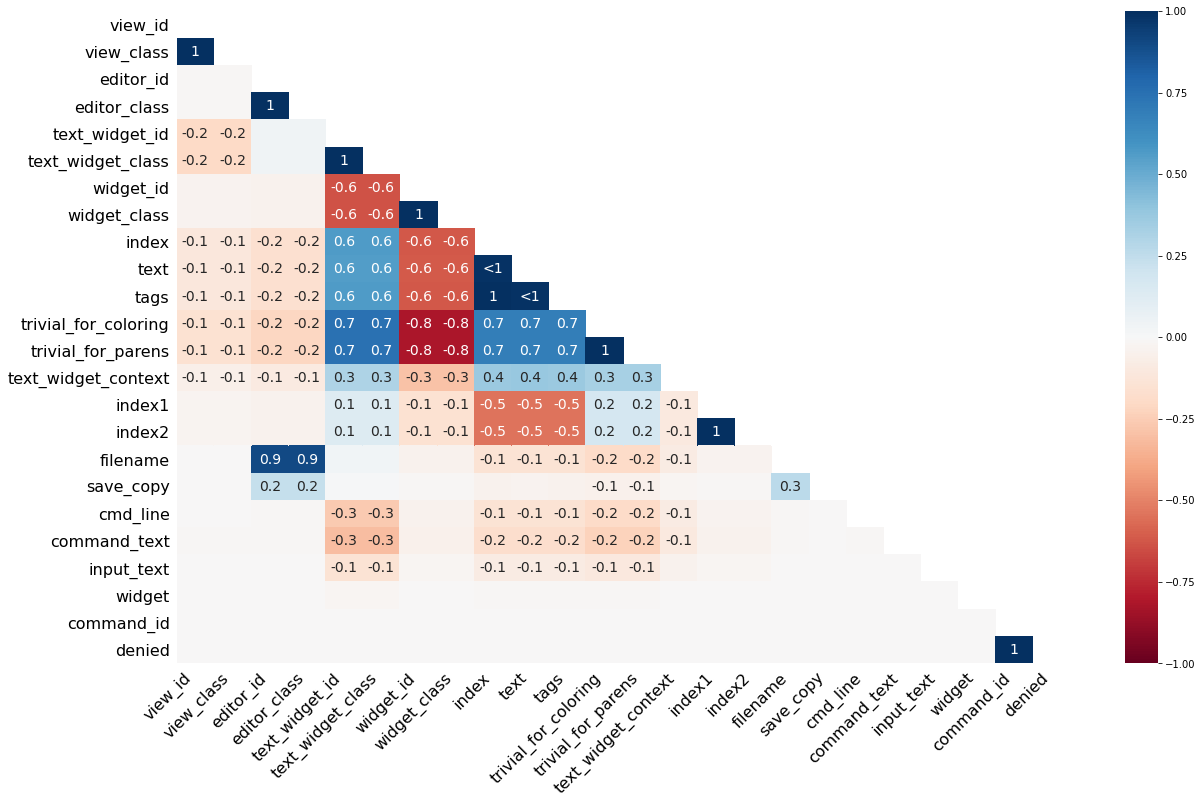

In [14]:
msno.heatmap(df) 

# Timestamp


In [23]:
df['time'] = pd.to_datetime(df['time'])
#df['time'].dtypes

# Errors


In [32]:
df_errors = df[df['text'].str.contains("Error", na=False)]
display_all(df_errors.head())

,view_id,view_class,sequence,time,student_ID,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,widget_class,index,text,tags,trivial_for_coloring,trivial_for_parens,text_widget_context,index1,index2,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
20,NaN,NaN,TextInsert,2020-03-23 14:33:52.646012,1,NaN,NaN,78015664.0,BaseShellText,NaN,NaN,4.0,ValueError: invalid literal for int() with bas...,"('io', 'stderr')",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,TextInsert,2020-03-23 14:38:45.693829,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,8.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,TextInsert,2020-03-23 14:39:53.491679,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,15.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,TextInsert,2020-03-23 14:41:16.309866,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,22.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,TextInsert,2020-03-23 14:41:29.322084,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,7.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_errors.shape

(7703, 27)